# Aula 02 - Fundamentos da aprendizagem supervisionada

____________

Conforme vimos anteriormente, dividimos ML em 3 grandes abordagens:

<img src="https://i.pinimg.com/originals/67/70/5d/67705d8c7aee0c6b601c16548076e924.png" width=600>

Neste curso, trataremos sobre a aprendizagem supervisionada e não supervisionada.

Inicialmente, vamos introduzir e explorar a fundo a **aprendizagem supervisionada**. 

Após seus conceitos e técnicas estarem bem fundamentados, nos ateremos ao estudo da aprendizagem não supervisionada no módulo de ML II.

Vamos apresentar a aprendizagem supervisionada segundo a seguinte figura:

<img src=https://s3-sa-east-1.amazonaws.com/lcpi/dfc2968c-b9a9-43a9-a531-e24e34c2e270.png>

Podemos resumir a informação acima no seguinte diagrama:

<img src=https://s3-sa-east-1.amazonaws.com/lcpi/70da0385-e3fc-4fda-ba15-0004cc3b68ae.PNG>

Esquematicamente, vamos dividir cada "passada no ciclo" de modelagem em dois grandes passos:

## Passo 1: construção do modelo

<img src=https://s3-sa-east-1.amazonaws.com/lcpi/23769bcb-a364-4d7b-a68f-04b3dfcde684.png>

## Passo 2: avaliação do modelo

<img src=https://s3-sa-east-1.amazonaws.com/lcpi/8de84cf0-adb1-4203-921c-bc8dec07df55.png>

Agora que temos estas noções claras, vamos concretizar, nas próximas aulas, as etapas do ciclo de modelagem (passos de 1) a 7)):

- 0) Conhecer os dados com os quais estamos trabalhando --- fazer todo o processo de EDA, etc., etc.


- 1) Importar a **classe do estimador que se deseja treinar** - escolher a hipótese!
    - Usaremos a biblioteca [scikit-learn](https://scikit-learn.org/stable/)
  
  
- 2) Instanciar a classe do estimador, **escolhendo os hiperparâmetros desejados**
    - Para a primeira versão do modelo, pode ser uma boa escolha utilizar os parâmetros default;
    - Veremos mais pra frente como escolher os hiperparâmetros adequadamente;
   
   
- 3) Separe os dados em **dados de treino** e **dados de teste**.
    - Em alguns casos, pode ser interessante criar também um conjunto de **dados de validação**
    - Para fazer a separação, usamos o [train-test split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
    
    
- 4) Treine o modelo, usando **os dados de treino**


- 5) Use o modelo treinado para **fazer previsões** usando os **dados de teste** (ou **de validação**)


- 6) **Avalie a performance do modelo com base nas previsões acima**


- 7) Se necessário, reinicie o ciclo!


- 8) Quando o modelo estiver suficientemente bom, faça o **deploy**

## Exemplos práticos com regressão linear simples

Em um primeiro momento, vamos enfocar a aplicação de uma **regressão linear simples**, e considerando apenas variáveis numéricas (vamos nos aprofundar no tratamento de variáveis categóricas ao longo do módulo).

Em uma regressão linear, estamos interessados em encontrar parâmetros que ajustem a relação entre duas grandezas, X e y, descrevendo esta relação na forma de uma reta (ou seja: à medida que uma delas varia, a outra deve variar seguindo a mesma proporção).

Formalmente, podemos definir o problema da seguinte forma: dada uma série de medidas de uma variável independente $x$, a variável dependente $y$ estabelece, com x, uma relação linear a partir de uma relação do tipo:

$$y = \beta_{1} x_{1} + \beta_{0}$$

sendo o $\beta_{1}$ é um coeficiente que "pondera" o valor dos dados de entrada (as *features*) e $\beta_{0}$ é o intercepto do modelo.

Em uma regressão linear, **o objetivo é estimar os parâmetros ótimos - $\beta$ e $\epsilon$ - que melhor ajustam a relação entre x e y**.

<img src = "https://editor.analyticsvidhya.com/uploads/375512.jpg">

Suponhamos que, para cada observação $x_{i}$ da variável $x$, façamos uma estimativa que vamos denotar por $\hat{y}_{i}$. Vamos, ainda, denotar por $y_{i}$ **o valor real** (ou seja, o próprio dado, e não nossa estimativa) daquela observação. Assim, gostaríamos de minimizar o erro entre as nossas predições e os valores reais. Podemos definir esta quantidade matematicamente como:

$$E = \frac{1}{N}\sum_{i=1}^{N}(\hat{y}_{i} - y_{i})²$$

$E$ representa o **erro quadrático médio** do nosso estimador, ou seja: mensura, na média, quanto cada predição se desvia do valor real. Por outro lado, como $\hat{y}_{i} = \beta_{1} x_{1} + \beta_{0}$, temos:

$$E = \frac{1}{N}\sum_{i=1}^{N}(\beta_{1} x_{1} + \beta_{0} - y_{i})²$$

A otimização da quantidade $E$, no sentido de minimizá-la, permite que obtamos estimativas para os parâmetros $\beta_{1}$ e $\beta_{2}$.

(Para mais detalhes da otimização matemática do processo, consulte, por exemplo, [este link](https://www.analyticsvidhya.com/blog/2021/10/everything-you-need-to-know-about-linear-regression/))

Apesar de não explorarmos em detalhes a resolução do processo de otimização, essencialmente, é este o processo que um algoritmo-padrão de regressão linear ordinária irá otimizar!

Agora, vamos fazer uma regressão com a nossa base de dados para ver o processo ocorrendo na prática!

### Exemplo 1: regressão para predição de salário a partir do tempo de experiência

Para este exemplo, vamos trabalhar com uma [base de dados](https://www.kaggle.com/datasets/abhishek14398/salary-dataset-simple-linear-regression) simples, que contém apenas uma variável independente (feature): o tempo de experiência.

In [2]:
import pandas as pd
df = pd.read_csv("Salary_dataset.csv")

In [3]:
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [4]:
df.drop(columns = "Unnamed: 0", inplace = True)

In [5]:
df

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0
5,3.0,56643.0
6,3.1,60151.0
7,3.3,54446.0
8,3.3,64446.0
9,3.8,57190.0


Podemos fazer um scatterplot para ter uma ideia de relações entre essas variáveis. Neste exemplo, "YearsExperience" corresponderia à variável dependente $x$, e, "Salary", à variável independente $y$.

<AxesSubplot: xlabel='YearsExperience', ylabel='Salary'>

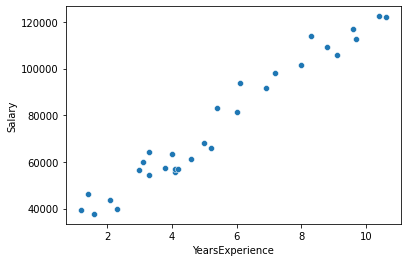

In [7]:
import seaborn as sns
sns.scatterplot(data = df,
               x = "YearsExperience",
               y = "Salary")

De fato, parece existir uma tendência linear entre essas quantidades!

In [9]:
from scipy.stats import pearsonr

In [10]:
pearsonr(df["YearsExperience"], df["Salary"])

(0.9782416184887598, 1.143068109227237e-20)

Realmente, obtivemos uma correlação linear bastante alta (~ 0.98), com um p-valor < 0.05.

Agora, vamos dividir nossa base de dados em conjuntos para "treinamento" e "teste" do nosso modelo de regressão. A função [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) do sklearn é muito útil para dividirmos, aleatoriamente, nossos dados entre conjunto de treinamento e teste.

In [11]:
from sklearn.model_selection import train_test_split

In [22]:
X = df["YearsExperience"]
y = df["Salary"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [23]:
print(X_train.shape)
print(X_test.shape)

(21,)
(9,)


In [18]:
y_train

22    101303.0
23    113813.0
4      39892.0
2      37732.0
25    105583.0
6      60151.0
18     81364.0
13     57082.0
7      54446.0
27    112636.0
1      46206.0
16     66030.0
0      39344.0
15     67939.0
29    121873.0
28    122392.0
9      57190.0
8      64446.0
12     56958.0
11     55795.0
5      56643.0
Name: Salary, dtype: float64

In [19]:
y_test

17     83089.0
21     98274.0
10     63219.0
19     93941.0
14     61112.0
20     91739.0
26    116970.0
3      43526.0
24    109432.0
Name: Salary, dtype: float64

In [25]:
from sklearn.linear_model import LinearRegression
import numpy as np

In [27]:
LR = LinearRegression()

LR.fit(np.array(X_train).reshape(-1,1), y_train) # fit nos dados de treino

LinearRegression()

In [28]:
# Este é nosso beta1
LR.coef_

array([9202.23359825])

Vamos, agora, plotar a nossa regressão (ainda somente com os dados de treinamento!)

In [29]:
# Este é nosso beta0
LR.intercept_

25130.3543556179

In [41]:
r2 = LR.score(np.array(X_train).reshape(-1,1), y_train)
print(r2)

0.960775692121653


Text(0.5, 0, 'Experiência (anos)')

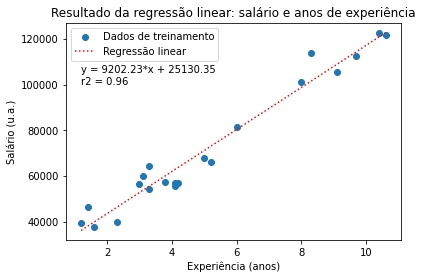

In [44]:
import matplotlib.pyplot as plt
plt.scatter(X_train, y_train) # dados que usamos no treinamento

x = np.linspace(X_train.min(), X_train.max())
#y = LR.coef_*x + LR.intercept_ 
y = LR.predict(np.array(x).reshape(-1,1))

plt.plot(x, y, ":r")

plt.legend(["Dados de treinamento", "Regressão linear"])
plt.text(1.2, 100000, f"y = {np.round(LR.coef_[0], 2)}*x + {np.round(LR.intercept_,2)}\nr2 = {np.round(r2, 2)}")

plt.title("Resultado da regressão linear: salário e anos de experiência")
plt.ylabel("Salário (u.a.)")
plt.xlabel("Experiência (anos)")

Geralmente, a performance dos modelos é melhor nos dados de treinamento (pois são os próprios exemplos que o modelo utilizou para aprender). Vamos ver como ficam os dados de teste?

In [45]:
# predições nos dados de teste
y_pred = LR.predict(np.array(X_test).reshape(-1,1))

In [46]:
y_pred

array([ 74822.41578619,  91386.43626305,  61939.28874864,  81263.97930497,
        67460.62890759,  88625.76618357, 113471.79689886,  44455.04491195,
       106110.01002026])

Text(0, 0.5, 'Valor predito')

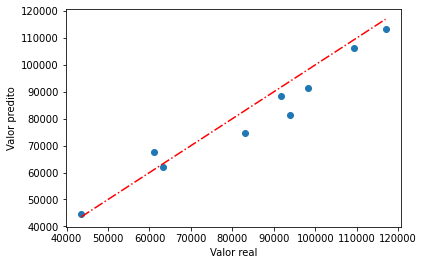

In [49]:
plt.scatter(y_test, y_pred)
x = np.linspace(y_test.min(), y_test.max())
plt.plot(x, x, '-.r')

plt.xlabel("Valor real")
plt.ylabel("Valor predito")

Idealmente, gostaríamos que as predições caíssem **exatamente sobre a reta y = x**.

O scikit-learn nos disponibiliza [uma série de métricas](https://scikit-learn.org/stable/modules/model_evaluation.html) para a etapa de avaliação dos modelos! Vejamos alguns exemplos abaixo.

In [53]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
print(f"Resultados na base de teste")
print(f"r2: {r2_score(y_test, y_pred)}")
print(f"MAE: {mean_absolute_error(y_test, y_pred)}")
print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"MAPE: {mean_absolute_percentage_error(y_test, y_pred)}")

Resultados na base de teste
r2: 0.9248580247217076
MAE: 5146.886734888229
MSE: 39139215.999588534
MAPE: 0.06046601919771074


Vamos plotar nossos dados sobre o mesmo gráfico, combinando treinamento e teste.

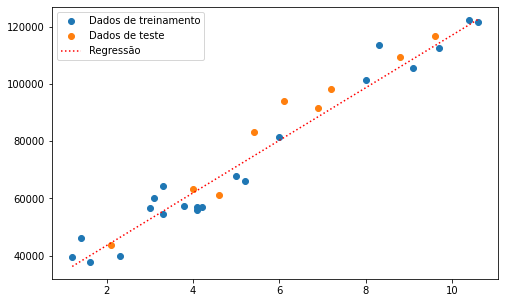

In [59]:
plt.figure(figsize = (8 ,5))
plt.scatter(X_train, y_train)
plt.scatter(X_test, y_test)

x = np.linspace(X_train.min(), X_train.max())
y = LR.coef_*x + LR.intercept_

plt.plot(x, y, ':r')
plt.legend(["Dados de treinamento", "Dados de teste", "Regressão"])

### Exemplo 2: predição de preços de carros no Brasil (2022)

Vamos avaliar [um dataset](https://www.kaggle.com/datasets/vagnerbessa/average-car-prices-bazil) que contém preços de carros no Brasil ao longo do ano de 2022.

In [60]:
df = pd.read_csv("fipe_2022.csv")

In [61]:
df

,year_of_reference,month_of_reference,fipe_code,authentication,brand,model,fuel,gear,engine_size,year_model,avg_price_brl,age_years
0,2022,January,038001-6,vwmrywl5qs,Acura,NSX 3.0,Gasoline,manual,3.0,1995,43779.0,28
1,2022,January,038001-6,t9mt723qhz,Acura,NSX 3.0,Gasoline,manual,3.0,1994,42244.0,29
2,2022,January,038001-6,tr5wv4z21g,Acura,NSX 3.0,Gasoline,manual,3.0,1993,40841.0,30
3,2022,January,038001-6,s2xxsjz3mt,Acura,NSX 3.0,Gasoline,manual,3.0,1992,39028.0,31
4,2022,January,038001-6,rtm9gj7zk8,Acura,NSX 3.0,Gasoline,manual,3.0,1991,35678.0,32
...,...,...,...,...,...,...,...,...,...,...,...,...
290270,2022,December,061001-1,lzrp3rpklh8q,Walk,Buggy Walk Sport 1.6 8V 58cv,Gasoline,manual,1.6,2009,22894.0,14
290271,2022,December,061001-1,lrfw427w9v5h,Walk,Buggy Walk Sport 1.6 8V 58cv,Gasoline,manual,1.6,2008,22270.0,15
290272,2022,December,061001-1,lh98rfxnhy18,Walk,Buggy Walk Sport 1.6 8V 58cv,Gasoline,manual,1.6,2007,21663.0,16
290273,2022,December,061001-1,k9dtwsps5sy1,Walk,Buggy Walk Sport 1.6 8V 58cv,Gasoline,manual,1.6,2006,21073.0,17


Como é usual, temos algumas colunas numéricas e outras categóricas (modelo do carro, tipo de combustível etc). Por enquanto, vamos nos ater somente às colunas numéricas (com o decorrer do módulo, vamos entrar em mais detalhes no tratamento de variáveis categóricas).

In [62]:
df.corr(method = "pearson", numeric_only = True)

,year_of_reference,engine_size,year_model,avg_price_brl,age_years
year_of_reference,NaN,NaN,NaN,NaN,NaN
engine_size,NaN,1.000000,-0.122644,0.345570,0.122644
year_model,NaN,-0.122644,1.000000,0.304294,-1.000000
avg_price_brl,NaN,0.345570,0.304294,1.000000,-0.304294
age_years,NaN,0.122644,-1.000000,-0.304294,1.000000


In [63]:
df.corr(method = "spearman", numeric_only = True)

,year_of_reference,engine_size,year_model,avg_price_brl,age_years
year_of_reference,NaN,NaN,NaN,NaN,NaN
engine_size,NaN,1.000000,-0.143009,0.358040,0.143009
year_model,NaN,-0.143009,1.000000,0.789807,-1.000000
avg_price_brl,NaN,0.358040,0.789807,1.000000,-0.789807
age_years,NaN,0.143009,-1.000000,-0.789807,1.000000


A discrepância entre a correlação de Pearson e Spearman acima para as variáveis *avg_price_brl* e *age_years* parece indicar uma forte relação não linear entre elas. De fato, podemos observá-la no gráfico de dispersão que se segue.

<AxesSubplot: xlabel='age_years', ylabel='avg_price_brl'>

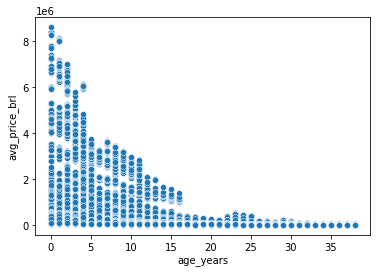

In [64]:
sns.scatterplot(data = df,
               x = "age_years",
               y = "avg_price_brl")

Podemos, também, utilizar o *pairplot* para verificar relações na base de dados, par a par.

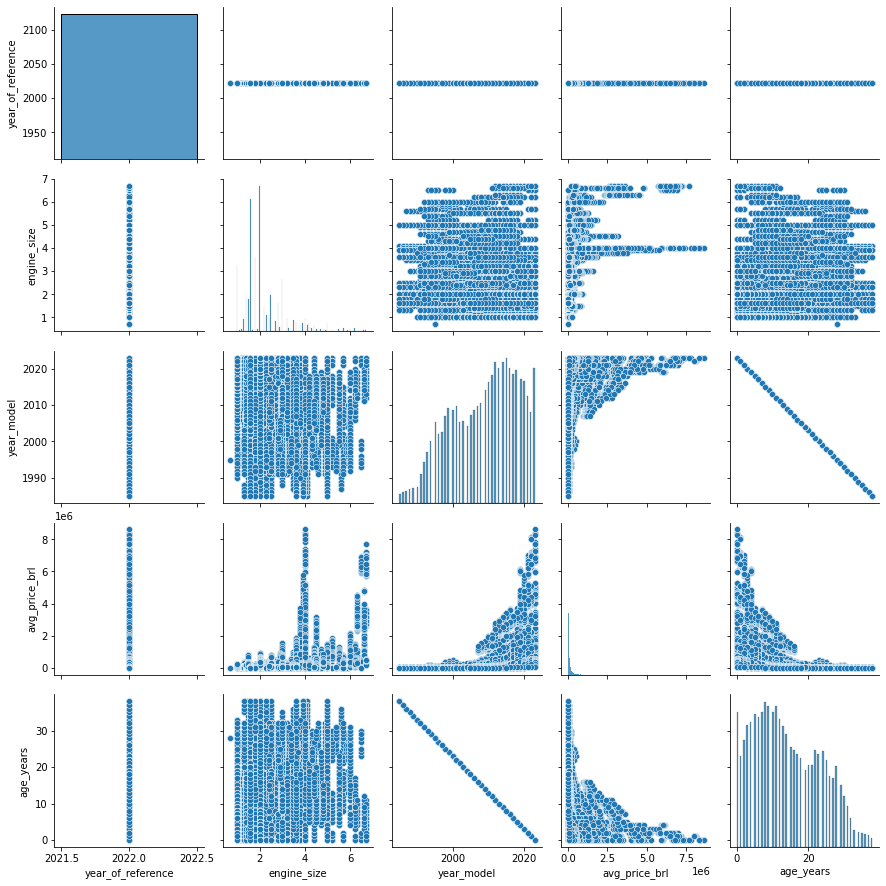

In [65]:
sns.pairplot(df)

Vemos acima, que temos várias relações aparentemente não lineares. O que será que a aplicação de uma regressão linear resulta, neste caso?

In [66]:
# Divisão em conjuntos de treino e teste
X = df.drop(columns = "avg_price_brl")
y = df["avg_price_brl"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [67]:
X_train.shape

(203192, 11)

In [68]:
X_test.shape

(87083, 11)

In [69]:
y_train

202309     31411.0
268252    147881.0
131718     92321.0
70819      28737.0
1339       45497.0
            ...   
21440      16556.0
117583     12474.0
73349     179961.0
267336     40884.0
128037     34413.0
Name: avg_price_brl, Length: 203192, dtype: float64

In [70]:
y_test

174972     11640.0
63603      26037.0
40726       6693.0
151415     63191.0
151807     41665.0
            ...   
217494     26953.0
280097     69582.0
6952       26953.0
125414     23135.0
279477    220079.0
Name: avg_price_brl, Length: 87083, dtype: float64

In [71]:
X_train.head()

,year_of_reference,month_of_reference,fipe_code,authentication,brand,model,fuel,gear,engine_size,year_model,age_years
202309,2022,September,003282-4,p6mcwmlxhgp,Ford,Focus Sedan 2.0 16V/2.0 16V Flex 4p Aut.,Gasoline,automatic,2.0,2009,14
268252,2022,December,093003-2,hxqcfzlv9yp,Caoa Chery,ARRIZO 6 PRO 1.5 Turbo Flex Aut.,Gasoline,automatic,1.5,2023,0
131718,2022,June,015195-5,cf7r9v0r5wsj4,Hyundai,HB20S Vision Bluelink 1.6 Flex 16V Aut.,Gasoline,automatic,1.6,2022,1
70819,2022,March,005267-1,n58gccvxs05h,VW - VolksWagen,Saveiro TITAN 1.6 Mi Total Flex 2p,Gasoline,manual,1.6,2008,15
1339,2022,January,009071-9,wjr6mhr57qp,BMW,750iL Highline 5.4 24V,Gasoline,manual,5.4,1996,27


In [72]:
# Em um primeiro momento, vamos olhar apenas para "age_years"
LR = LinearRegression() # instanciando o estimador

# Treinamento: função fit
LR.fit(np.array(X_train["age_years"]).reshape(-1,1), y_train)

LinearRegression()

In [73]:
# beta1
LR.coef_

array([-10432.92994105])

In [75]:
# beta0
LR.intercept_

268385.42277857836

In [76]:
# coeficiente de determinação (r2 - dados de treinamento)
LR.score(np.array(X_train["age_years"]).reshape(-1,1), y_train)

0.09290649090673064

In [79]:
# predições do modelo
y_pred = LR.predict(np.array(X_test["age_years"]).reshape(-1,1))
y_pred2 = LR.coef_*X_test["age_years"] + LR.intercept_

In [81]:
(y_pred - y_pred2).sum() # exatamente igual

0.0

In [78]:
# r2 dos dados de teste
LR.score(np.array(X_test["age_years"]).reshape(-1,1), y_test)

0.09180975896038657

Diferentemente do exemplo anterior, neste caso, tivemos um r2 **bastante baixo**, de apenas 0.09!

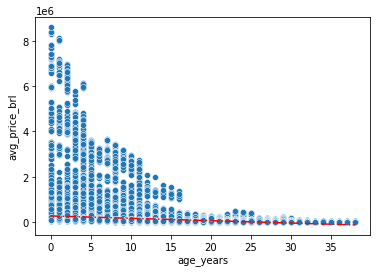

In [83]:
sns.scatterplot(data = X_train,
               x = "age_years",
               y = y_train)
x = np.linspace(X_train["age_years"].min(), X_train["age_years"].max())
plt.plot(x, LR.coef_*x + LR.intercept_, '-.r')

De fato, conseguimos visualizar como a regressão não captura bem o comportamento dos dados neste caso, justamente pela alta tendência não linear! Como podemos contornar essa limitação?

Por um lado, poderíamos dispor de abordagens de regressão não lineares para modelar a relação entre x e y neste caso (e vamos estudar algumas metodologias ao longo do módulo). No entanto, podemos utilizar alguns artifícios que ainda nos permitam efetuar uma regressão linear simples.

O gráfico de dispersão que fizemos acima se parece muito a uma função exponencial, não é mesmo?

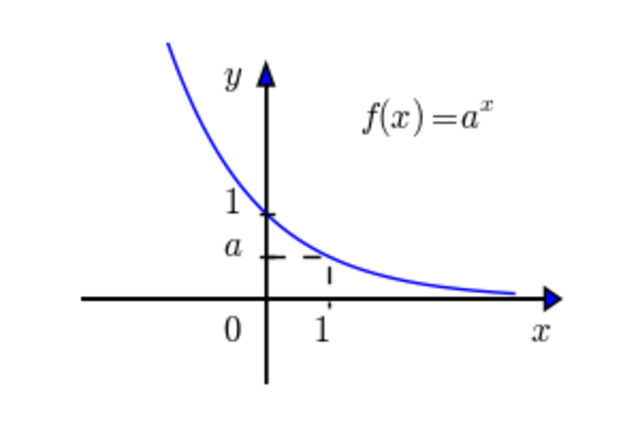

Sendo assim, podemos imaginar que nosso problema é descrito por uma relação do tipo

$$y = ae^{bx}$$

Ao aplicar o **logaritmo neperiano** em ambos os membros da equação acima, temos que

$$log(y) = log(a) + blog(e^{x})$$

ou simplesmente

$$log(y) = log(a) + bx$$

Apenas definindo $Y = log(y)$ e $A = log(a)$, nossa equação assume, novamente, o "formato linear" que vimos anteriormente!

$$Y = A + bx$$

Para verificar a validade do que fizemos acima, vamos, agora, plotar novamente um gráfico de dispersão, mas entre a variável $x$ ("age_years") e o logaritmo natural da variável $y$.

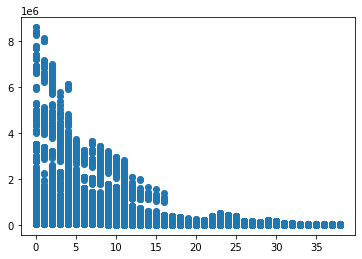

In [84]:
plt.scatter(df["age_years"], df["avg_price_brl"])

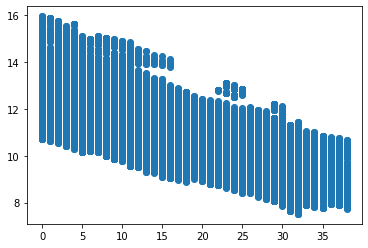

In [85]:
plt.scatter(df["age_years"], np.log(df["avg_price_brl"]))

Agora parece que a tendência é bem mais linear, não é?

Vamos tentar aplicar a regressão linear novamente?

In [93]:
LR = LinearRegression() # instanciando um novo regressor
LR.fit(np.array(X_train["age_years"]).reshape(-1,1), np.log(y_train)) # treinamento do modelo

LinearRegression()

In [94]:
# predições do modelo
y_pred = LR.predict(np.array(X_test["age_years"]).reshape(-1,1))

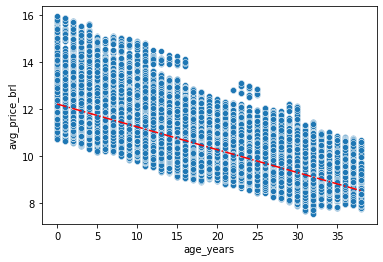

In [95]:
# Plot da regressão nos dados de treino
sns.scatterplot(data = X_train,
               x = "age_years",
               y = np.log(y_train))

x = np.linspace(X_train["age_years"].min(), X_train["age_years"].max())
plt.plot(x, LR.coef_*x + LR.intercept_, '-.r')

In [97]:
r2_score(np.log(y_test), y_pred)

0.5720247585141505

Apesar de ainda não termos obtido um coeficiente de determinação (r2) tão elevado, ele já é consideravelmente maior que o que obtivemos anteriormente, de 0.09!

E como ficariam as previsões no conjunto de teste?

Text(0, 0.5, 'Valor predito')

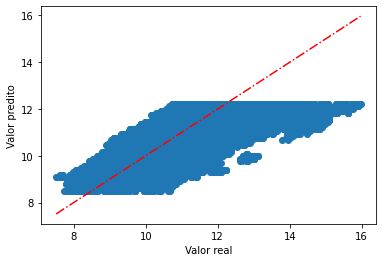

In [102]:
plt.scatter(np.log(y_test), y_pred)

x = np.linspace(np.log(y_test).min(), np.log(y_test).max())
plt.plot(x, x, '-.r')

plt.xlabel("Valor real")
plt.ylabel("Valor predito")

In [107]:
print(f"Resultados na base de teste")
print(f"r2: {r2_score(np.log(y_test), y_pred)}")
print(f"MAE: {mean_absolute_error(np.log(y_test), y_pred)}")
print(f"MSE: {mean_squared_error(np.log(y_test), y_pred)}")
print(f"MAPE: {mean_absolute_percentage_error(np.log(y_test), y_pred)}")

Resultados na base de teste
r2: 0.5720247585141505
MAE: 0.6239186614737192
MSE: 0.62778103497113
MAPE: 0.05669224904050061


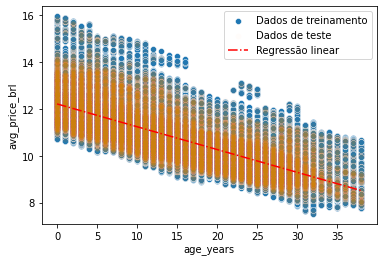

In [114]:
sns.scatterplot(data = X_train,
               x = "age_years",
               y = np.log(y_train))

sns.scatterplot(data = X_test,
               x = "age_years",
               y = np.log(y_test),
               alpha = 0.02)

x = np.linspace(X_train["age_years"].min(), X_train["age_years"].max())
plt.plot(x, LR.coef_*x + LR.intercept_, '-.r')

plt.legend(["Dados de treinamento", "Dados de teste", "Regressão linear"])

Ainda podemos obter os dados antes da transformação que fizemos, retornando-os ao formato original, pois sabemos que, em nossa regressão $Y = A + bx$, $Y = log(y)$ (sendo $y$ a variável original) e $A = log(a)$.

In [139]:
print(f"A = {LR.intercept_}")
print(f"b = {LR.coef_[0]}")
print(f"a = exp(A) => a = {np.exp(LR.intercept_)}")
print(f"y = a*exp(bx)")

a = np.round(np.exp(LR.intercept_),2)
b = np.round(LR.coef_[0],2)

A = 12.216281141269143
b = -0.09756109462790398
a = exp(A) => a = 202052.156039071
y = a*exp(bx)


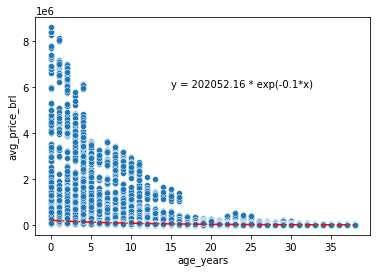

In [142]:
sns.scatterplot(data = X_train,
               x = "age_years",
               y = y_train)

x = np.linspace(X_train["age_years"].min(), X_train["age_years"].max())
y = np.exp(LR.coef_*x + LR.intercept_)

plt.plot(x, y, '-.r')
plt.text(15, 6e+06, f"y = {a} * exp({b}*x)");

In [119]:
y_train.describe()

count    2.031920e+05
mean     1.211973e+05
std      3.171956e+05
min      1.845000e+03
25%      2.191375e+04
50%      4.684800e+04
75%      1.059622e+05
max      8.600000e+06
Name: avg_price_brl, dtype: float64

(0.0, 100000.0)

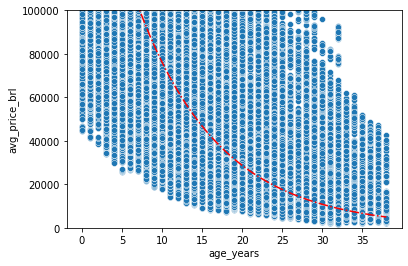

In [120]:
sns.scatterplot(data = X_train,
               x = "age_years",
               y = y_train)

x = np.linspace(X_train["age_years"].min(), X_train["age_years"].max())
y = np.exp(LR.coef_*x + LR.intercept_)

plt.plot(x, y, '-.r')
plt.ylim([0,1e+05])

Note que, apesar de termos capturado um comportamento não linear, ele só é mais pronunciado, com nosso modelo, para os menores valores de preço! Por que será que isso ocorre?

Ao longo do módulo, vamos aprender a lidar melhor com as relações não lineares!